# 级联分类器
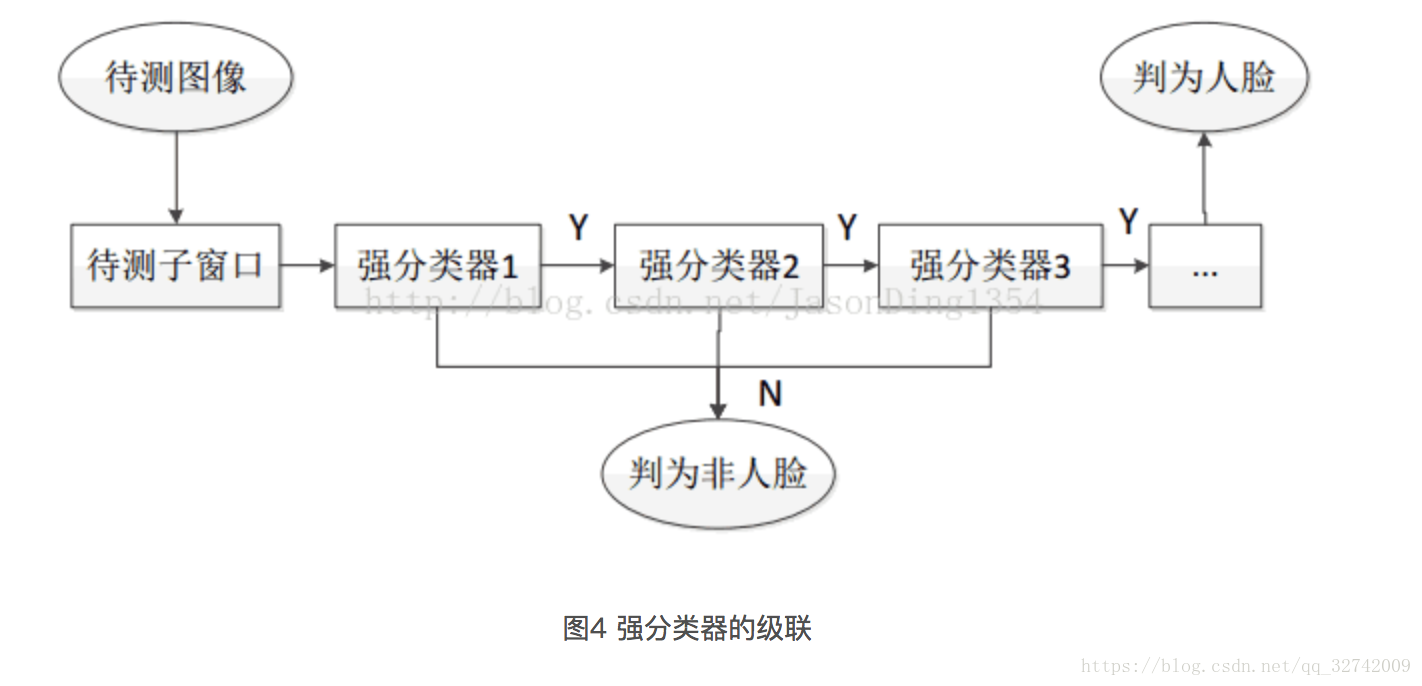


In [1]:
from __future__ import print_function
import cv2 as cv
import argparse
def detectAndDisplay(frame):
    frame_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    frame_gray = cv.equalizeHist(frame_gray)
    #-- 检测面部
    faces = face_cascade.detectMultiScale(frame_gray)
    for (x,y,w,h) in faces:
        center = (x + w//2, y + h//2)
        frame = cv.ellipse(frame, center, (w//2, h//2), 0, 0, 360, (255, 0, 255), 4)
        faceROI = frame_gray[y:y+h,x:x+w]
        #-- 在每张面部上检测眼睛
        eyes = eyes_cascade.detectMultiScale(faceROI)
        for (x2,y2,w2,h2) in eyes:
            eye_center = (x + x2 + w2//2, y + y2 + h2//2)
            radius = int(round((w2 + h2)*0.25))
            frame = cv.circle(frame, eye_center, radius, (255, 0, 0 ), 4)
    cv.imshow('Capture - Face detection', frame)
    
face_cascade_name = "../data/haarcascades/haarcascade_frontalface_alt.xml"
eyes_cascade_name = "../data/haarcascades/haarcascade_eye_tree_eyeglasses.xml"

face_cascade = cv.CascadeClassifier()
eyes_cascade = cv.CascadeClassifier()
#-- 1. 加载级联
if not face_cascade.load(face_cascade_name):
    print('--(!)Error loading face cascade')
    exit(0)
if not eyes_cascade.load(eyes_cascade_name):
    print('--(!)Error loading eyes cascade')
    exit(0)
camera_device = 0
#-- 2. 读取视频流
cap = cv.VideoCapture(camera_device)
if not cap.isOpened:
    print('--(!)Error opening video capture')
    exit(0)
while True:
    ret, frame = cap.read()
    if frame is None:
        print('--(!) No captured frame -- Break!')
        break
    detectAndDisplay(frame)
    if cv.waitKey(10) == 27:
        break
cv.destroyAllWindows()